In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
import pandas as pd
import numpy as np
import pickle

In [3]:
df_images = pd.read_csv("data/X.csv", header=None)
df_labels = pd.read_csv("data/y.csv", header=None)
df_labels.columns = ["label"]

In [4]:
# number of rows in the dataframe
df_images.shape

(5000, 784)

There are 5000 images, and to plot a single image we want to slice out that row from the dataframe, reshape the list (vector) of pixels into a 28x28 matrix, and then plot that matrix with imshow

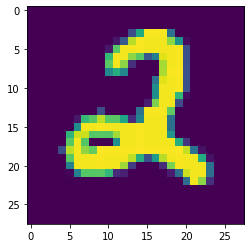

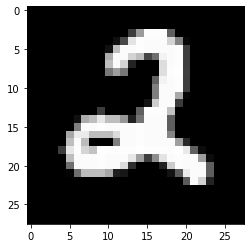

In [5]:
im = df_images.iloc[1020].values  # picked a row at random
im = np.reshape(im, (28, 28))
fig, ax = plt.subplots(1)
ax.imshow(im, interpolation="None")  # interpolation blurs to interpolate b/w pixels
fig, ax = plt.subplots(1)
ax.imshow(im, cmap=plt.get_cmap("gray"), interpolation="None")

#### Neural Nets for Multiclass Classification
##### Disclaimer: `sklearn` is not the best library for NN. For using off the shelf network architecture you should explore `keras`. For experimenting with novel architecture, I would recommend `tensorflow` or `pytorch`.
The kind of neural network that is implemented in sklearn is a Multi Layer Perceptron (MLP). The class MLPClassifier is the tool to use when you want a neural net to do classification for you.

In [6]:
from sklearn.neural_network import MLPClassifier

In [7]:
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network._multilayer_perceptron:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity

In [8]:
y = df_labels["label"].values
X = df_images.values

In [9]:
# initialize the classifer
classifier = MLPClassifier(solver="sgd")

In [ ]:
classifier.hidden_layer_sizes = (16,)  # Just one hidden layer
classifier.activation = "logistic"

In [ ]:
classifier.fit(X, y)

In [ ]:
(y == classifier.predict(X)).mean()

#### Visualizing the Cost Function Trajectory
This didn't really work out of the box, we weren't able to converge even after hitting the maximum number of iterations in gradient descent (which was the default of 200). 

In [ ]:
plt.plot(classifier.loss_curve_)
plt.title('Loss During GD (Rate=0.001)')
plt.xlabel("number of steps")
plt.ylabel("loss function")

In [ ]:
classifier.learning_rate_init = .1
classifier.fit(X, y)

In [ ]:
(y == classifier.predict(X)).mean()

In [ ]:
plt.plot(classifier.loss_curve_)
plt.title('Loss During GD (Rate=.1)')
plt.xlabel("number of steps")
plt.ylabel("loss function")

In [ ]:
classifier.learning_rate_init = .001
classifier.max_iter = 400
classifier.fit(X, y)

In [ ]:
plt.plot(classifier.loss_curve_)
plt.title('Loss During GD (Rate=.01)')
plt.xlabel("number of steps")
plt.ylabel("loss function")

In [ ]:
(y == classifier.predict(X)).mean()

In [ ]:
df_labels["success"] = (y == classifier.predict(X))

for name, group in df_labels.groupby("label"):
    frac = sum(group["success"])/len(group)
    print("Success rate for labeling digit %i was %f " %(name, frac))

In [ ]:
# training a complex model
classifier.hidden_layer_sizes = (16, 8)  # Just one hidden layer
classifier.activation = "logistic"

In [ ]:
classifier.learning_rate_init = .01
classifier.max_iter = 400
classifier.fit(X, y)

In [ ]:
(y == classifier.predict(X)).mean()

In [ ]:
plt.plot(classifier.loss_curve_)
plt.title('Loss During GD (Rate=.01)')
plt.xlabel("number of steps")
plt.ylabel("loss function")

In [ ]:
df_labels["success"] = (y == classifier.predict(X))

for name, group in df_labels.groupby("label"):
    frac = sum(group["success"])/len(group)
    print("Success rate for labeling digit %i was %f " %(name, frac))

In [ ]:
df_labels["assigned"] = classifier.predict(X)
fig, axs = plt.subplots(5, 2, sharex=False, sharey=True, figsize=(12,12))
fig.suptitle("Misclassifications For Each Digit", fontsize=18)
axs = axs.flatten()

for name, group in df_labels.groupby("label"):
    group = group[group["assigned"] != name]  # Get rid of correct predictions - they swamp the histogram!
    ax = axs[name-1]
    ax.hist(group["assigned"], label=("digit %i" %name), bins=np.arange(1, 11, 1)+0.5)  # Shift the bins to get labels aligned
    ax.set_xlim([0, 11])
    ax.legend(loc="upper right")
    ax.yaxis.set_visible(False)

#### References:
https://sdsawtelle.github.io/blog/output/week4-andrew-ng-machine-learning-with-python.html